# Likelihood Ratio

The likelihood ratio quantifies **how much more probable our observed data** is under one model compared to another, providing a natural way to choose between competing explanations of the data.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide21.png)

# Key Formula

The likelihood ratio between Model 1 and Model 2 is:

$$
\text{LR} = \frac{\mathcal{L}(\text{M}_1 \mid \text{D})}{\mathcal{L}(\text{M}_2 \mid \text{D})}
$$

Where:
- $\text{LR}$ is the likelihood ratio
- $\mathcal{L}(\text{M}_1 \mid \text{D})$ is the likelihood function for Model 1 given data D
- $\mathcal{L}(\text{M}_2 \mid \text{D})$ is the likelihood function for Model 2 given data D
- $\text{D}$ represents the observed data


# Technical Details

## Basic Interpretation
For the likelihood ratio (LR):
- $\text{LR} > 1$: Model 1 better explains the data (higher likelihood)
- $\text{LR} < 1$: Model 2 better explains the data (higher likelihood)  
- $\text{LR} = 1$: Both models explain the data equally well

The likelihood ratio quantifies the relative evidence for one model compared to another, providing a direct way to compare competing hypotheses based on the observed data.

## Properties
- The likelihood ratio is always non-negative: $\text{LR} \geq 0$
- Can be used to compare any two models
- Forms the basis for many statistical tests and model selection criteria
- In genetics, commonly used for testing association between variants and traits

# Example

This example demonstrates how to calculate likelihood ratios for genetic association analysis. We will use the same genotype and phenotype data from our likelihood example, then calculate likelihood ratios between different models to compare their relative support from the data.

- Related topics:
  - [OLS](https://gaow.github.io/statgen-prerequisites/ordinary_least_squares.html)
  - [summary statistics](https://gaow.github.io/statgen-prerequisites/summary_statistics.html)
  - [likelihood](https://gaow.github.io/statgen-prerequisites/likelihood.html)

Let's first generate the genotype data and trait values for 5 individuals.


In [17]:
# Clear the environment
rm(list = ls())
set.seed(19)  # For reproducibility

# Generate genotype data for 5 individuals at 1 variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

# Set true beta and generate phenotype data
true_beta <- 0.4
true_sd <- 1.0

# Generate phenotype with true effect
Y_true <- X * true_beta + rnorm(N, 0, true_sd)

Now, let's create two functions to compute the likelihood and log-likelihood under different models (in this case, different βs) for the effect of a genetic variant on the phenotype:


In [18]:
# Likelihood function for normal distribution
likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  
  # Calculate likelihood (product of normal densities)
  prod(dnorm(Y, mean = mu, sd = sd, log = FALSE))
}

# Log-likelihood function (more numerically stable)
log_likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  
  # Calculate log-likelihood (sum of log normal densities)
  sum(dnorm(Y, mean = mu, sd = sd, log = TRUE))
}

Now, let's apply this function to our three models:


In [19]:
# Test three different models with different beta values
beta_values <- c(0, 0.5, 1.0)  # Three different effect sizes to test
model_names <- paste0("Model ", 1:3, " (beta = ", beta_values, ")")

# Calculate likelihoods and log-likelihoods
results <- data.frame(
  Model = model_names,
  Beta = beta_values,
  Likelihood = numeric(3),
  Log_Likelihood = numeric(3)
)

for (i in 1:3) {
  results$Likelihood[i] <- likelihood(beta = beta_values[i], sd = true_sd, X = X, Y = Y_true)
  results$Log_Likelihood[i] <- log_likelihood(beta = beta_values[i], sd = true_sd, X = X, Y = Y_true)
}

print("Likelihood and Log-Likelihood Results:")
results

[1] "Likelihood and Log-Likelihood Results:"


Model,Beta,Likelihood,Log_Likelihood
<chr>,<dbl>,<dbl>,<dbl>
Model 1 (beta = 0),0.0,0.0019210299,-6.254894
Model 2 (beta = 0.5),0.5,0.0021961524,-6.121048
Model 3 (beta = 1),1.0,0.0009236263,-6.987203


Now let's calculate the likelihood ratios between each pair of models:


In [20]:
# Calculate all pairwise likelihood ratios
model_pairs <- combn(1:3, 2)  # All combinations of 2 models from 3
n_pairs <- ncol(model_pairs)

lr_results <- data.frame(
  Comparison = character(n_pairs),
  Model_1 = character(n_pairs),
  Model_2 = character(n_pairs),
  LR = numeric(n_pairs),
  Log_LR = numeric(n_pairs),
  Interpretation = character(n_pairs),
  stringsAsFactors = FALSE
)

for (i in 1:n_pairs) {
  m1 <- model_pairs[1, i]  # First model index
  m2 <- model_pairs[2, i]  # Second model index
  
  # Calculate likelihood ratio: L(M1|D) / L(M2|D)
  lr_value <- results$Likelihood[m1] / results$Likelihood[m2]
  log_lr_value <- results$Log_Likelihood[m1] - results$Log_Likelihood[m2]
  
  # Determine interpretation
  if (lr_value > 1) {
    interpretation <- paste("Model", m1, "better supported")
  } else if (lr_value < 1) {
    interpretation <- paste("Model", m2, "better supported")
  } else {
    interpretation <- "Equal support"
  }
  
  # Store results
  lr_results$Comparison[i] <- paste("Model", m1, "vs Model", m2)
  lr_results$Model_1[i] <- results$Model[m1]
  lr_results$Model_2[i] <- results$Model[m2]
  lr_results$LR[i] <- lr_value
  lr_results$Log_LR[i] <- log_lr_value
  lr_results$Interpretation[i] <- interpretation
}

The results are:

In [21]:
lr_results

Comparison,Model_1,Model_2,LR,Log_LR,Interpretation
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Model 1 vs Model 2,Model 1 (beta = 0),Model 2 (beta = 0.5),0.8747253,-0.1338454,Model 2 better supported
Model 1 vs Model 3,Model 1 (beta = 0),Model 3 (beta = 1),2.0798778,0.7323091,Model 1 better supported
Model 2 vs Model 3,Model 2 (beta = 0.5),Model 3 (beta = 1),2.3777498,0.8661546,Model 2 better supported


Based on these likelihood ratio results, we can see clear patterns in model support from our genetic data. Model 2 ($\beta = 0.5$) $\beta$ receives the strongest overall support, as evidenced by it being favored over both Model 1 (LR = 0.87, meaning Model 2 is 1/0.87 ≈ 1.14 times more likely) and Model 3 (LR = 2.38, meaning Model 2 is 2.38 times more likely than Model 3). 

Interestingly, Model 1 ($\beta = 0$) is actually better supported than Model 3 ($\beta = 1.0$) with a likelihood ratio of 2.08, suggesting that no genetic effect is more plausible than a large effect of $\beta = 1.0$. 

This pattern makes biological sense given that our true effect size used to generate the data was $\beta = 0.4$ - Model 2 ($\beta = 0.5$) is closest to this true value, followed by Model 1 ($\beta = 0$), while Model 3 ($\beta = 1.0$) substantially overestimates the genetic effect. The likelihood ratios thus correctly identify the model parameters that best approximate the true underlying biological relationship between genotype and phenotype.

# Supplementary


## Graphical Summary

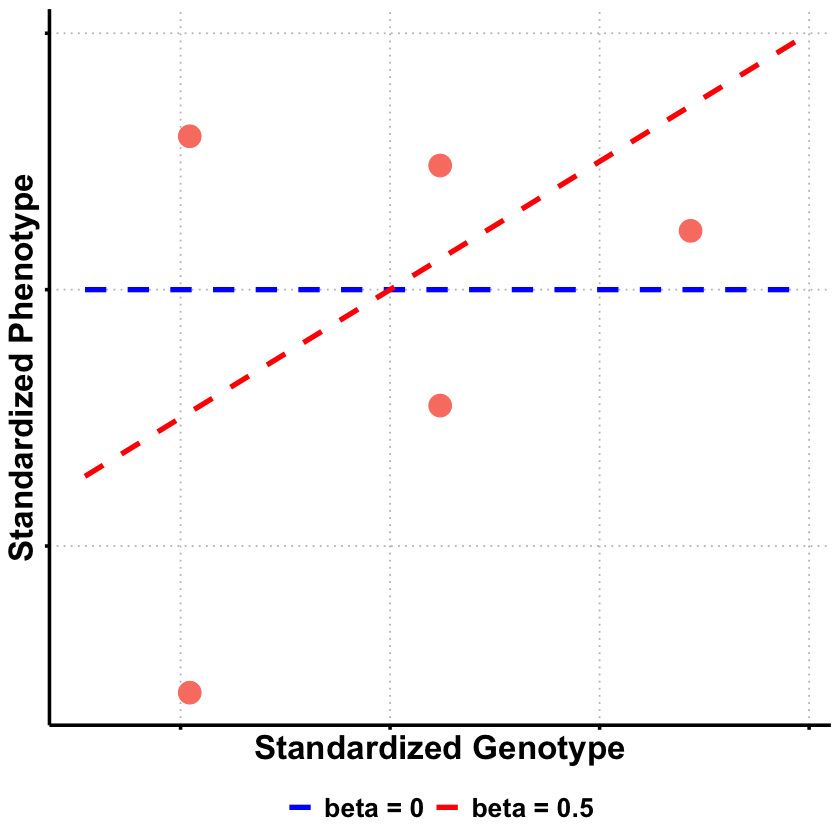

In [26]:
library(ggplot2)
library(dplyr)

# Prepare the data from our analysis
df_scatter <- data.frame(
 Genotype = X,
 Phenotype = Y_true
)

# Create sequence for smooth lines
x_vals <- seq(min(X) - 0.5, max(X) + 0.5, length.out = 100)

# Create data frame for regression lines using only beta = 0 and beta = 0.5
selected_betas <- c(0, 0.5)
lines_df <- data.frame(
 Genotype = rep(x_vals, 2),
 Phenotype = c(
   selected_betas[1] * x_vals,  # beta = 0
   selected_betas[2] * x_vals   # beta = 0.5
 ),
 Model = factor(rep(paste("beta =", selected_betas), each = length(x_vals)),
                levels = paste("beta =", selected_betas))
)

# Create plot
p <- ggplot(df_scatter, aes(x = Genotype, y = Phenotype)) +
 geom_point(color = "salmon", size = 6) +
 labs(
   x = "Standardized Genotype",
   y = "Standardized Phenotype"
 ) +
 theme_minimal() +
 theme(
   # Font styling
   text = element_text(size = 18, face = "bold"),
   axis.title = element_text(size = 20, face = "bold"),
   
   # Hide axis tick labels
   axis.text.x = element_blank(),
   axis.text.y = element_blank(),
   
   # Customize grid and axes
   panel.grid.major = element_line(color = "gray", linetype = "dotted"),
   panel.grid.minor = element_blank(),
   axis.line = element_line(linewidth = 1),
   axis.ticks = element_line(linewidth = 1),
   
   # Transparent background
   panel.background = element_rect(fill = "transparent", color = NA),
   plot.background = element_rect(fill = "transparent", color = NA)
 ) +
 geom_line(data = lines_df, aes(x = Genotype, y = Phenotype, color = Model, linetype = Model), linewidth = 1.5) +
 scale_color_manual(values = c("beta = 0" = "blue", "beta = 0.5" = "red")) +
 scale_linetype_manual(values = c("beta = 0" = "dashed", "beta = 0.5" = "dashed")) +
 theme(
   legend.title = element_blank(),
   legend.position = "bottom",
   legend.text = element_text(size = 16, face = "bold")
 )

# Show and save plot
print(p)
ggsave("./cartoons/likelihood_ratio.png", plot = p,
      width = 6, height = 6, dpi = 300, bg = "transparent")